<a href="https://colab.research.google.com/github/SriRamK345/RetailSalses_Forecast/blob/main/Final_Pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Final_Project

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# load store dataset
df_store = pd.read_csv("/content/stores_data_set.csv")
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
df_sales = pd.read_csv("/content/sales_data_set.csv")
df_sales.head()

<ipython-input-6-b32668e6a2ed>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv("/content/sales_data_set.csv")


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [7]:
df_feature = pd.read_csv("/content/Features_data_set.csv")
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [8]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [9]:
df_store.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [10]:
df_store.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [11]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200760 entries, 0 to 200759
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         200760 non-null  int64  
 1   Dept          200760 non-null  int64  
 2   Date          200760 non-null  object 
 3   Weekly_Sales  200759 non-null  float64
 4   IsHoliday     200759 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 7.7+ MB


In [12]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,200760.000000,200760.000000,200759.000000
mean,10.703148,43.139918,17934.956639
std,5.888177,29.770259,25370.327875
min,1.000000,1.000000,-1699.000000
25%,6.000000,18.000000,2770.000000
50%,11.000000,36.000000,8585.950000
75%,16.000000,71.000000,22074.425000
max,21.000000,99.000000,693099.360000


In [13]:
df_sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    1
IsHoliday       1
dtype: int64

In [14]:
df_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [15]:
df_feature.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [16]:
df_feature.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [17]:
df_feature.shape

(8190, 12)

In [18]:
df_feature.Store.unique(),"------------#########----------",len(df_feature.Store.unique())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 '------------#########----------',
 45)

In [19]:
df_store.shape

(45, 3)

In [20]:
df_sales.shape

(200760, 5)

In [21]:
merged_df = pd.merge(df_store, df_sales, on='Store', how='outer')
merged_df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1.0,05/02/2010,24924.50,False
1,1,A,151315,1.0,12/02/2010,46039.49,True
2,1,A,151315,1.0,19/02/2010,41595.55,False
3,1,A,151315,1.0,26/02/2010,19403.54,False
4,1,A,151315,1.0,05/03/2010,21827.90,False
...,...,...,...,...,...,...,...
200779,41,A,196321,NaN,NaN,NaN,NaN
200780,42,C,39690,NaN,NaN,NaN,NaN
200781,43,C,41062,NaN,NaN,NaN,NaN
200782,44,C,39910,NaN,NaN,NaN,NaN


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200784 entries, 0 to 200783
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         200784 non-null  int64  
 1   Type          200784 non-null  object 
 2   Size          200784 non-null  int64  
 3   Dept          200760 non-null  float64
 4   Date          200760 non-null  object 
 5   Weekly_Sales  200759 non-null  float64
 6   IsHoliday     200759 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 10.7+ MB


In [23]:
merged_df.isnull().sum()

Store            0
Type             0
Size             0
Dept            24
Date            24
Weekly_Sales    25
IsHoliday       25
dtype: int64

In [24]:
df = pd.merge(merged_df, df_feature, on=['Store','Date'], how='outer')
df.head()

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False


In [25]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,205971.0,11.190435,6.767988,1.000,6.000000,11.000000,16.000000,45.000000
Size,200784.0,144790.791248,59080.192200,34875.000,112238.000000,151315.000000,203742.000000,219622.000000
Dept,200760.0,43.139918,29.770259,1.000,18.000000,36.000000,71.000000,99.000000
Weekly_Sales,200759.0,17934.956639,25370.327875,-1699.000,2770.000000,8585.950000,22074.425000,693099.360000
Temperature,205946.0,60.458830,18.535575,-7.290,47.270000,62.590000,75.040000,101.950000
Fuel_Price,205946.0,3.335640,0.452602,2.472,2.908000,3.409000,3.702000,4.468000
MarkDown1,74955.0,7925.149242,8392.553326,-2781.450,3068.350000,5924.710000,9804.000000,103184.980000
MarkDown2,59203.0,3665.747914,10800.442002,-265.760,41.280000,193.820000,1839.820000,104519.540000
MarkDown3,69535.0,1754.879602,11053.732543,-179.260,5.840000,30.080000,111.350000,149483.310000
MarkDown4,73727.0,3390.801494,6187.482619,0.220,530.550000,1513.170000,3648.950000,67474.850000


In [26]:
df.isnull().sum()

Store                0
Type              5187
Size              5187
Dept              5211
Date                24
Weekly_Sales      5212
IsHoliday_x       5212
Temperature         25
Fuel_Price          25
MarkDown1       131016
MarkDown2       146768
MarkDown3       136436
MarkDown4       132244
MarkDown5       130998
CPI                610
Unemployment       610
IsHoliday_y         25
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205971 entries, 0 to 205970
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         205971 non-null  int64  
 1   Type          200784 non-null  object 
 2   Size          200784 non-null  float64
 3   Dept          200760 non-null  float64
 4   Date          205947 non-null  object 
 5   Weekly_Sales  200759 non-null  float64
 6   IsHoliday_x   200759 non-null  object 
 7   Temperature   205946 non-null  float64
 8   Fuel_Price    205946 non-null  float64
 9   MarkDown1     74955 non-null   float64
 10  MarkDown2     59203 non-null   float64
 11  MarkDown3     69535 non-null   float64
 12  MarkDown4     73727 non-null   float64
 13  MarkDown5     74973 non-null   float64
 14  CPI           205361 non-null  float64
 15  Unemployment  205361 non-null  float64
 16  IsHoliday_y   205946 non-null  object 
dtypes: float64(12), int64(1), object(4)
memory usage

In [28]:
df.columns

Index(['Store', 'Type', 'Size', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y'],
      dtype='object')

In [29]:
df.count()

Store           205971
Type            200784
Size            200784
Dept            200760
Date            205947
Weekly_Sales    200759
IsHoliday_x     200759
Temperature     205946
Fuel_Price      205946
MarkDown1        74955
MarkDown2        59203
MarkDown3        69535
MarkDown4        73727
MarkDown5        74973
CPI             205361
Unemployment    205361
IsHoliday_y     205946
dtype: int64

In [30]:
# Dependent - Weekly_Sales
# Supervised Regression

continuous_columns = ['Size', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                      'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
category_columns = ["Store",  "Type",   "IsHoliday_x", "IsHoliday_y", "Dept"]

In [31]:
string_columns = df.select_dtypes(exclude=['int64',"float64","datetime64"]).columns
numeric_columns = df.select_dtypes(include=['int64',"float64"]).columns

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205971 entries, 0 to 205970
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         205971 non-null  int64  
 1   Type          200784 non-null  object 
 2   Size          200784 non-null  float64
 3   Dept          200760 non-null  float64
 4   Date          205947 non-null  object 
 5   Weekly_Sales  200759 non-null  float64
 6   IsHoliday_x   200759 non-null  object 
 7   Temperature   205946 non-null  float64
 8   Fuel_Price    205946 non-null  float64
 9   MarkDown1     74955 non-null   float64
 10  MarkDown2     59203 non-null   float64
 11  MarkDown3     69535 non-null   float64
 12  MarkDown4     73727 non-null   float64
 13  MarkDown5     74973 non-null   float64
 14  CPI           205361 non-null  float64
 15  Unemployment  205361 non-null  float64
 16  IsHoliday_y   205946 non-null  object 
dtypes: float64(12), int64(1), object(4)
memory usage

In [33]:
df["Type"].value_counts()

Type
A    101810
B     98968
C         6
Name: count, dtype: int64

In [34]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    186604
True      14155
Name: count, dtype: int64

In [35]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    191416
True      14530
Name: count, dtype: int64

In [36]:
df= df.drop(columns=['IsHoliday_x'])

# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [37]:
# encoding for catagorical features into numerical
df['IsHoliday'] = df['IsHoliday'].map({True:1, False:0})
df['Type'] = df['Type'].map({'A':1, 'B':2, 'C':3})

In [38]:
df.tail()

,Store,Type,Size,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
205966,45,NaN,NaN,NaN,28/06/2013,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,0.0
205967,45,NaN,NaN,NaN,05/07/2013,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,0.0
205968,45,NaN,NaN,NaN,12/07/2013,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,0.0
205969,45,NaN,NaN,NaN,19/07/2013,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,0.0
205970,45,NaN,NaN,NaN,26/07/2013,NaN,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,0.0


In [43]:
# make Date feature into --> Day,Month,Year new features and drop Date column
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])
df.head()

ValueError: time data "27/01/" doesn't match format "%d/%m/%Y", at position 143. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
df.info()

In [ ]:
df.describe().T

In [ ]:
#df.corr()

In [ ]:
# check negative weekly_sales count
len(df[df['Weekly_Sales']<=0])

In [ ]:
# negative weekly_sales value convert to null value

df['Weekly_Sales'] = df['Weekly_Sales'].apply(lambda x: np.nan if x<=0 else x)
df.tail()

In [ ]:
df.describe().T

In [ ]:
# check null values of all features
df.isnull().sum()

In [ ]:
# create 'markdown' column for --> all markdowns are null means 0, otherwise 1 (any one markdown have value)

#df['markdown'] = df[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].notnull().any(axis=1).astype(int)
#df
#dfto_csv = df.to_csv('df.csv')

In [96]:
# check weekly_sales average --> holiday(1) and non-holiday(0)
#df.groupby('markdown')['Weekly_Sales'].mean()

In [97]:
import matplotlib.pyplot as plt
corr_df = df.copy()
# Calculate the correlation matrix
#df_corr = df5.drop(columns=['Day', 'Month', 'Year', 'Store', 'Dept','markdown']).dropna().corr()

# Create a heatmap
correlation_matrix = corr_df.corr()
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7ebdf2244820> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7ebdf2237a30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Display columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

In [ ]:
# Split the data into training and prediction sets
train_df = df[df['MarkDown1'].notnull()]
predict_df = df[df['MarkDown1'].isnull()]

# Features and target
features = ['Store', 'Type', 'Size', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Day', 'Month', 'Year']
target = 'MarkDown1'

X_train = train_df[features]
y_train = train_df[target]
X_predict = predict_df[features]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model.fit(X_train, y_train)

In [ ]:
# Predict missing values
predicted_values = model.predict(X_predict)

# Fill the missing values
df.loc[df['MarkDown1'].isnull(), 'MarkDown1'] = predicted_values

In [ ]:
# Display the first few rows of the modified DataFrame
df.head()

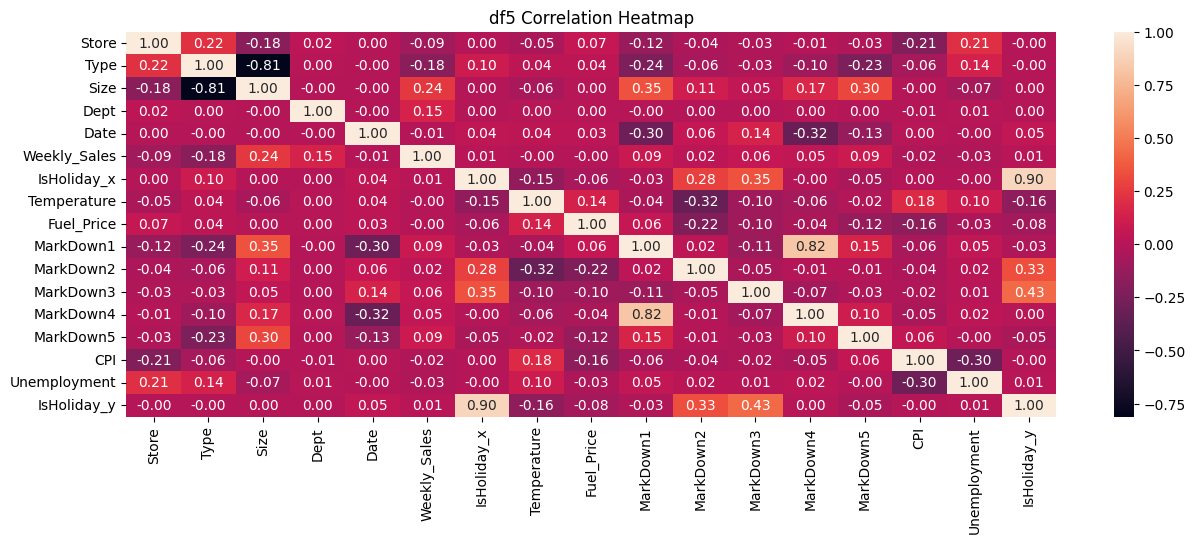

In [ ]:
import matplotlib.pyplot as plt

# Create a heatmap
correlation_matrix = corr_df.corr()
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("df5 Correlation Heatmap")
plt.show()


In [ ]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,2,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

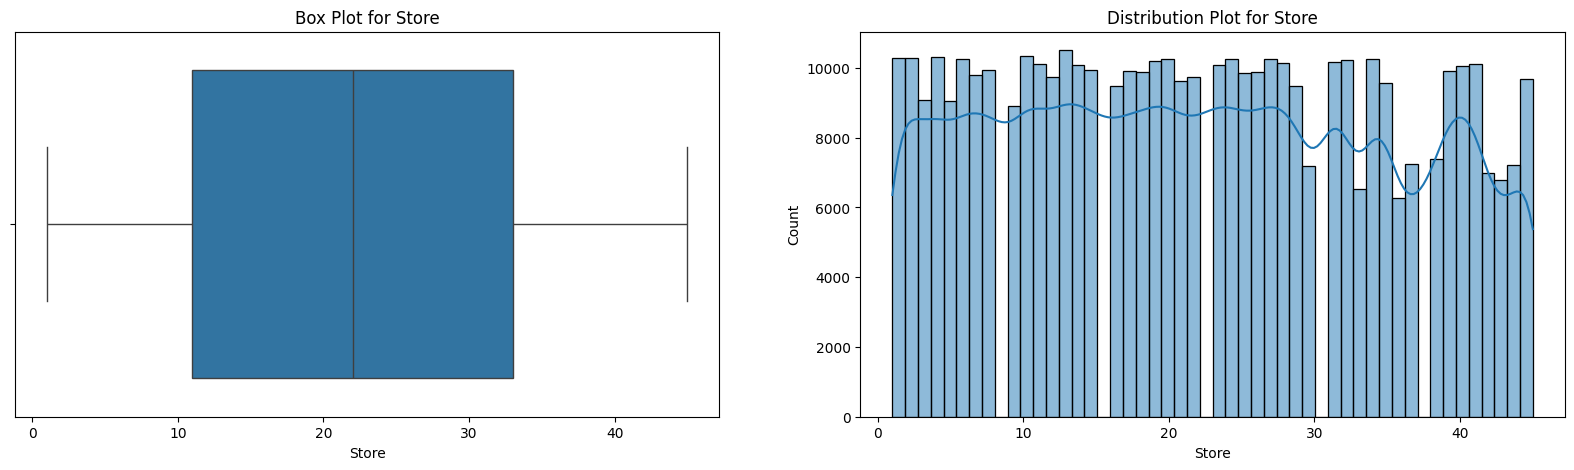

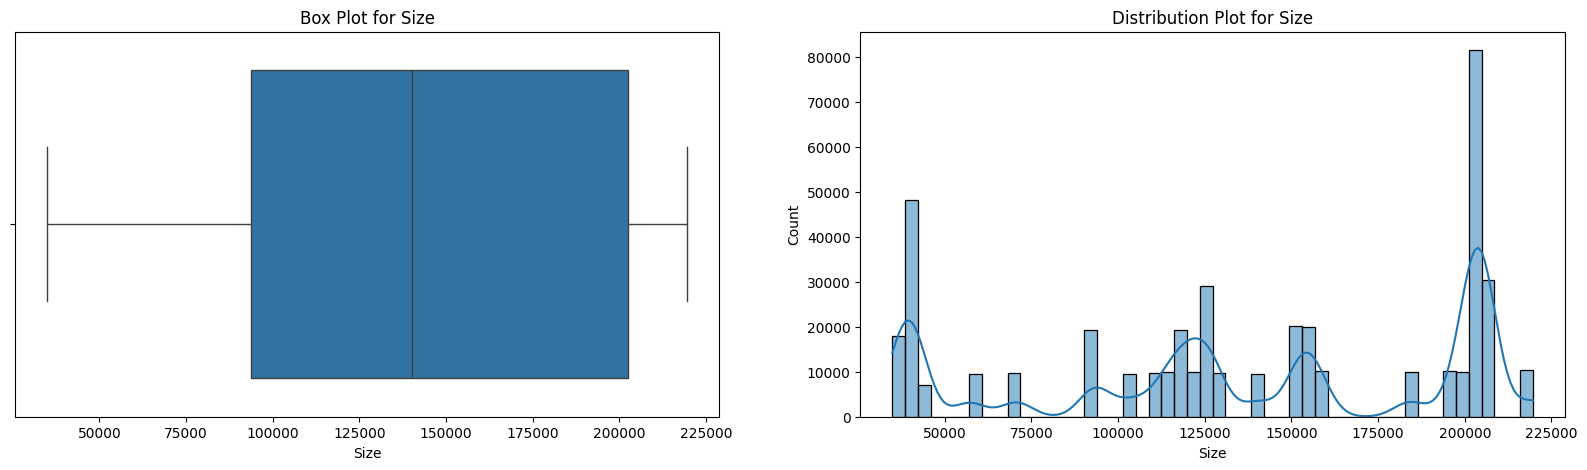

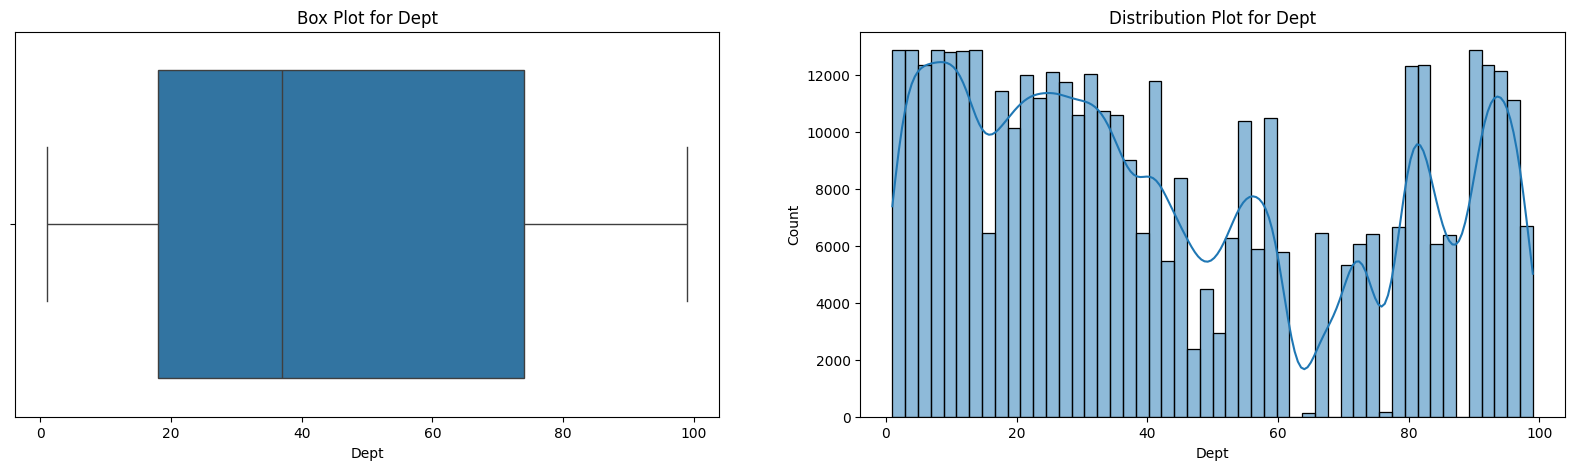

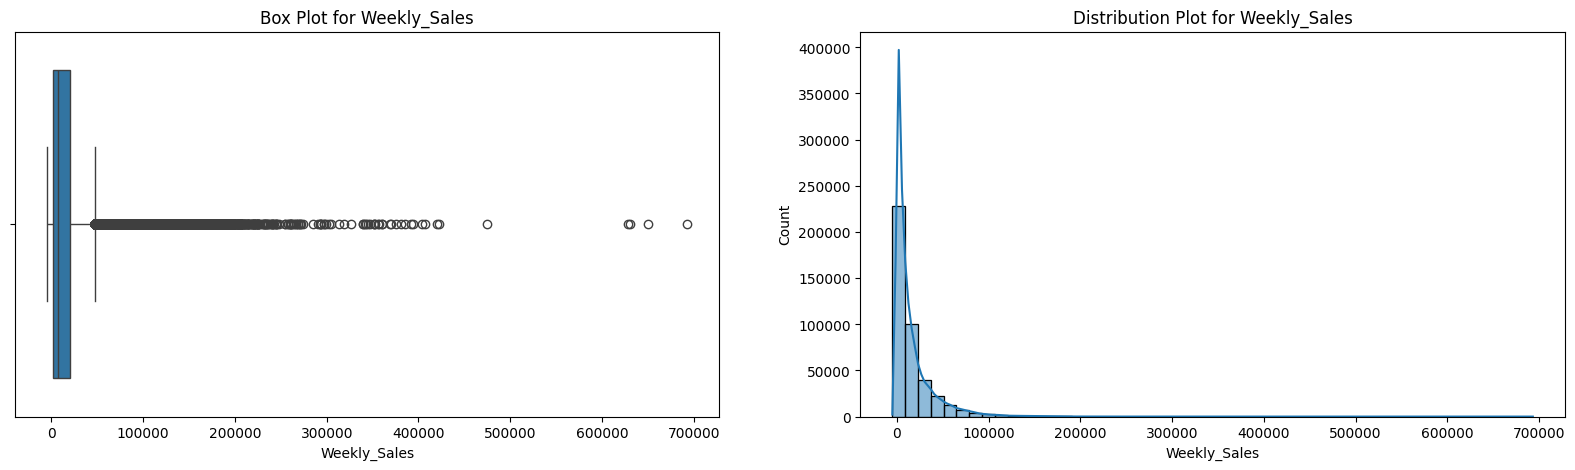

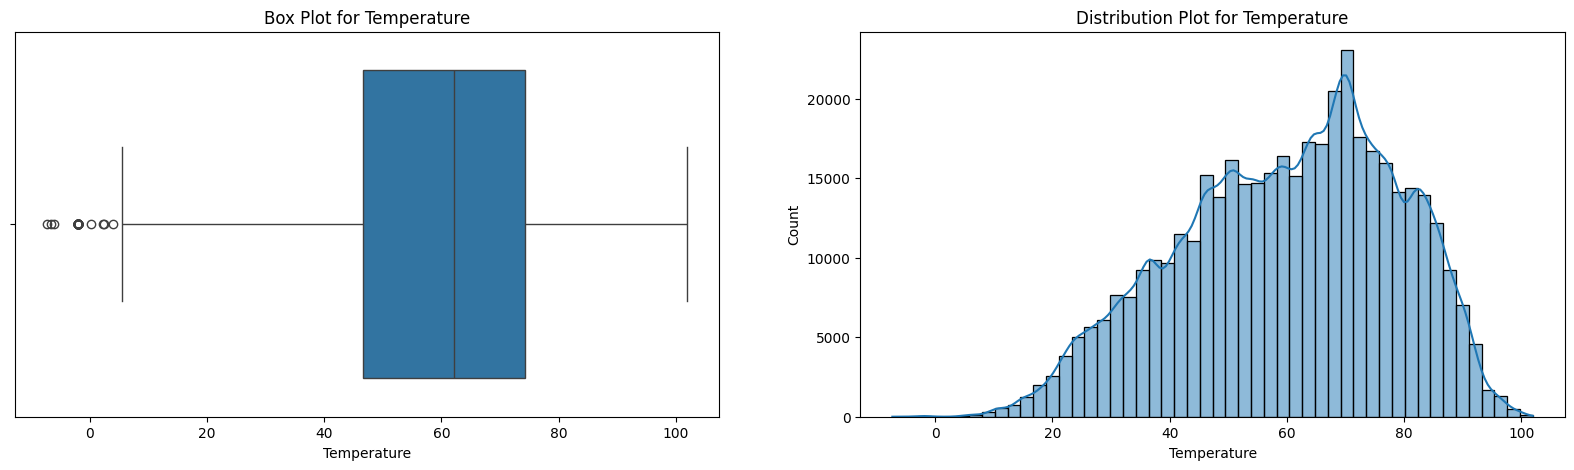

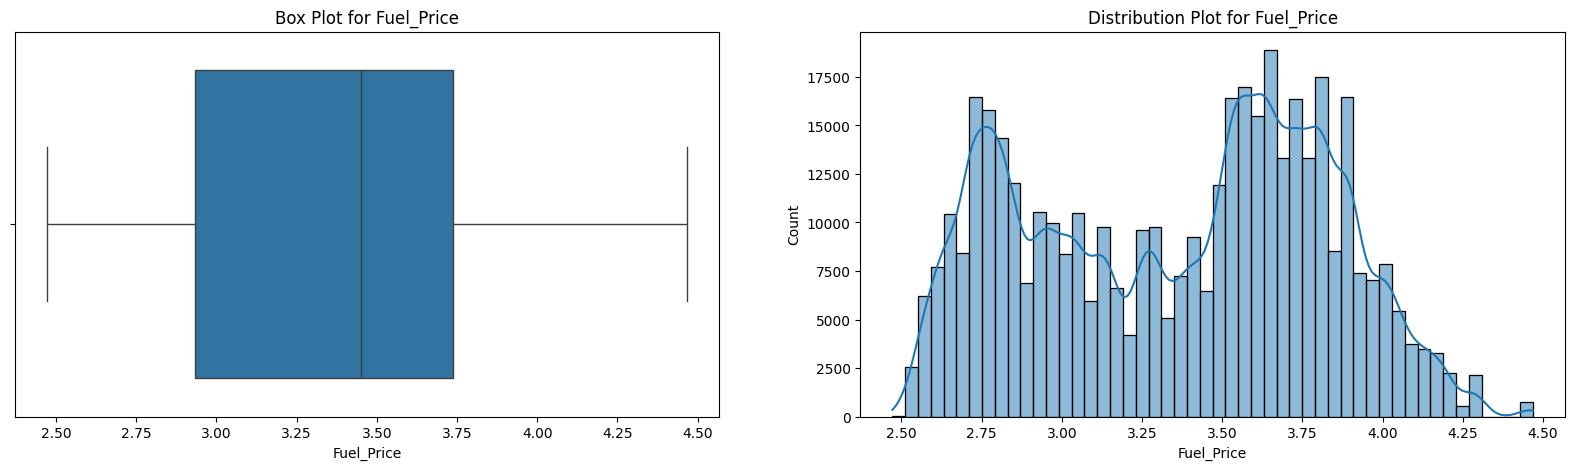

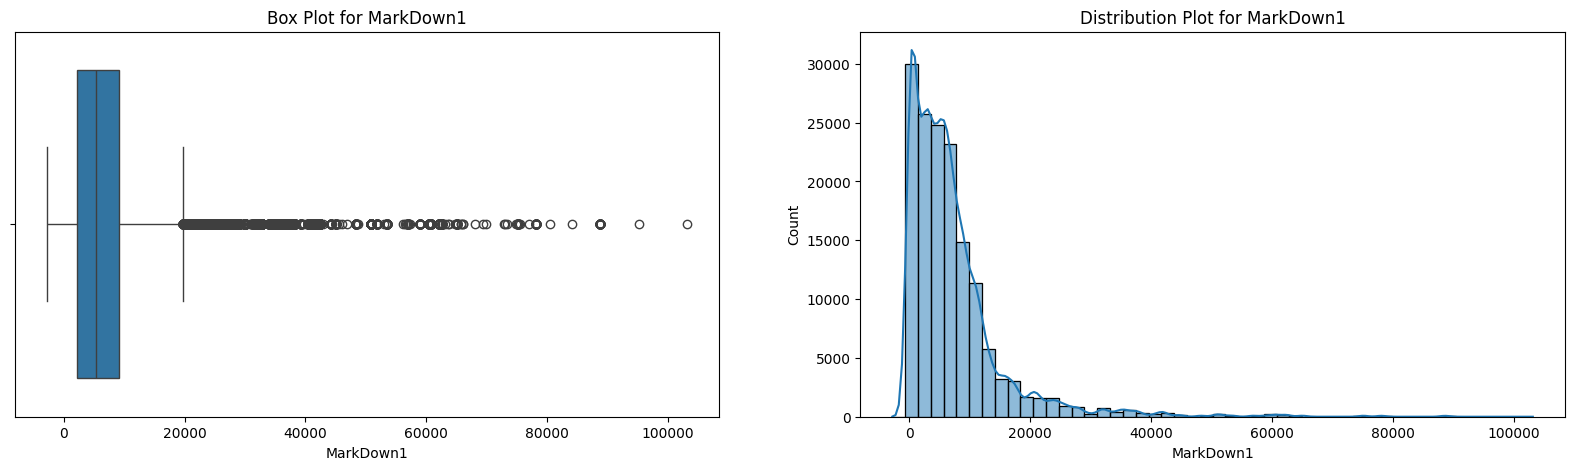

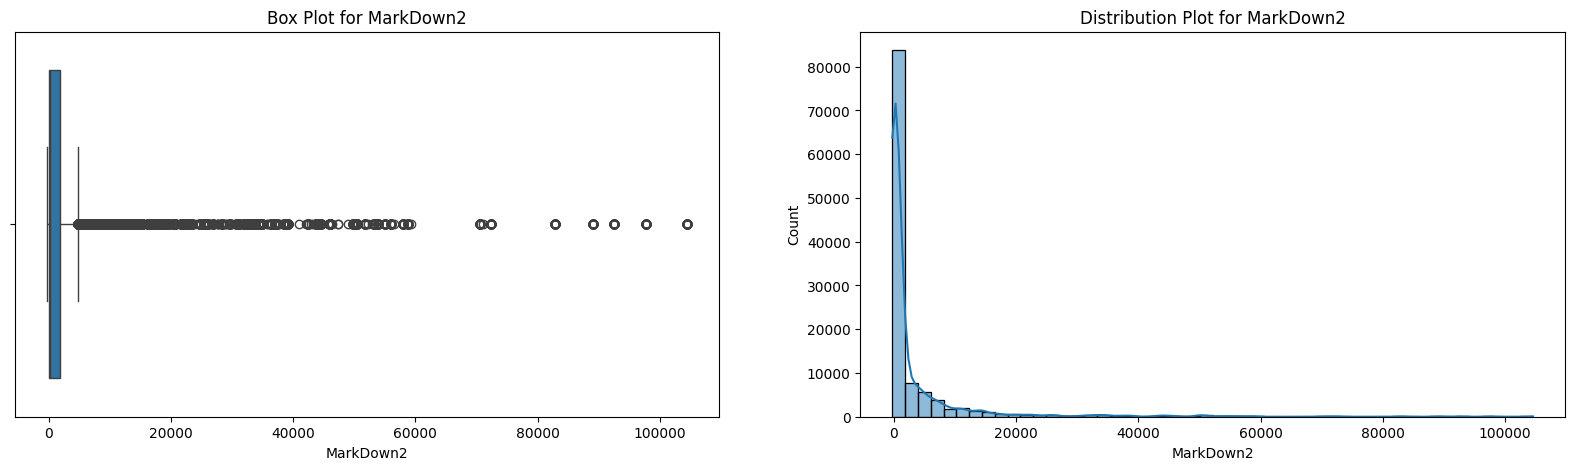

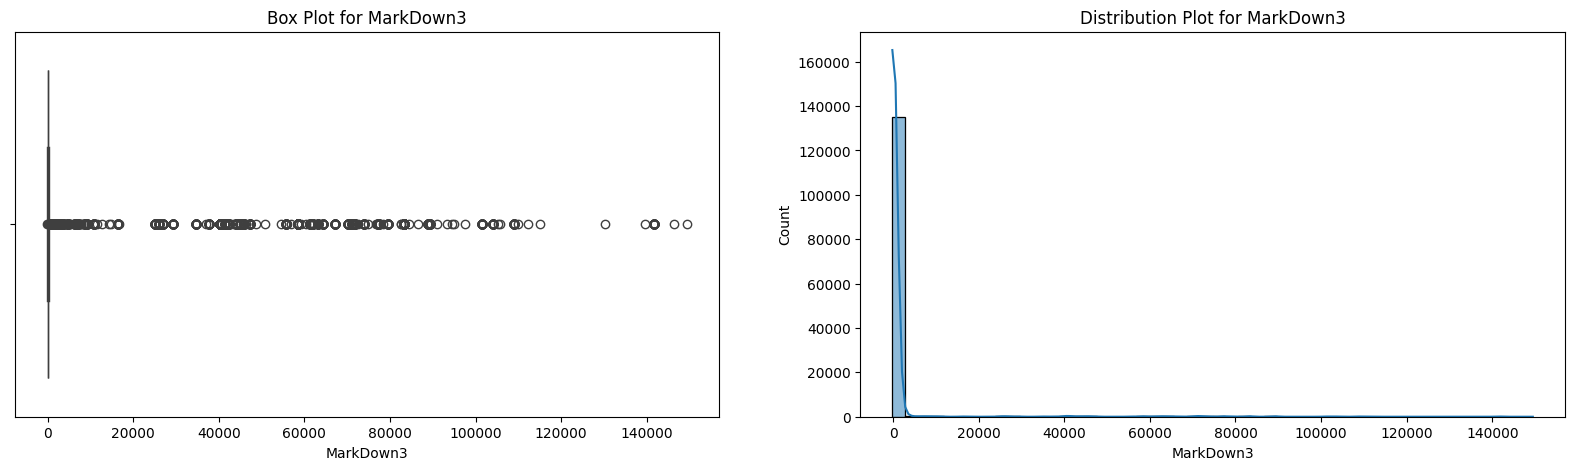

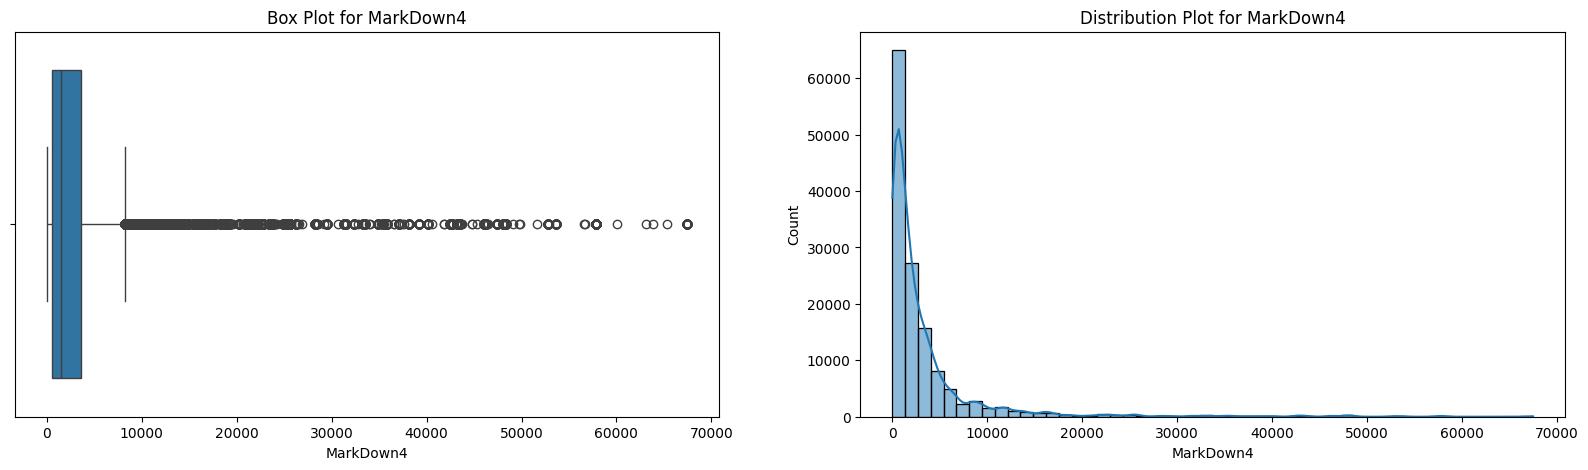

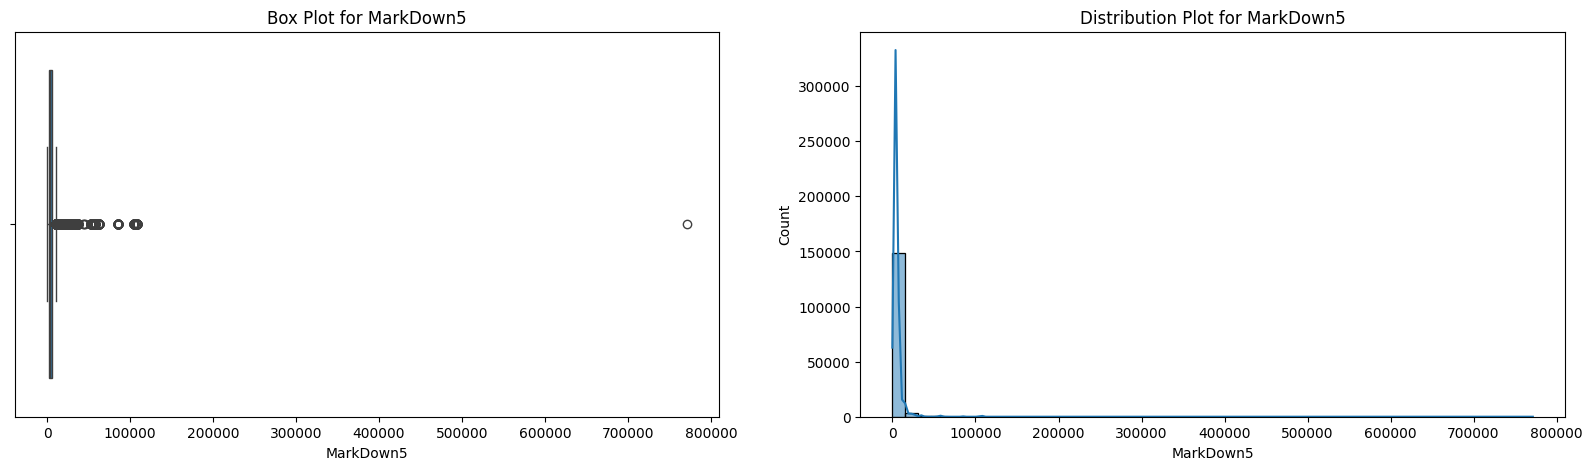

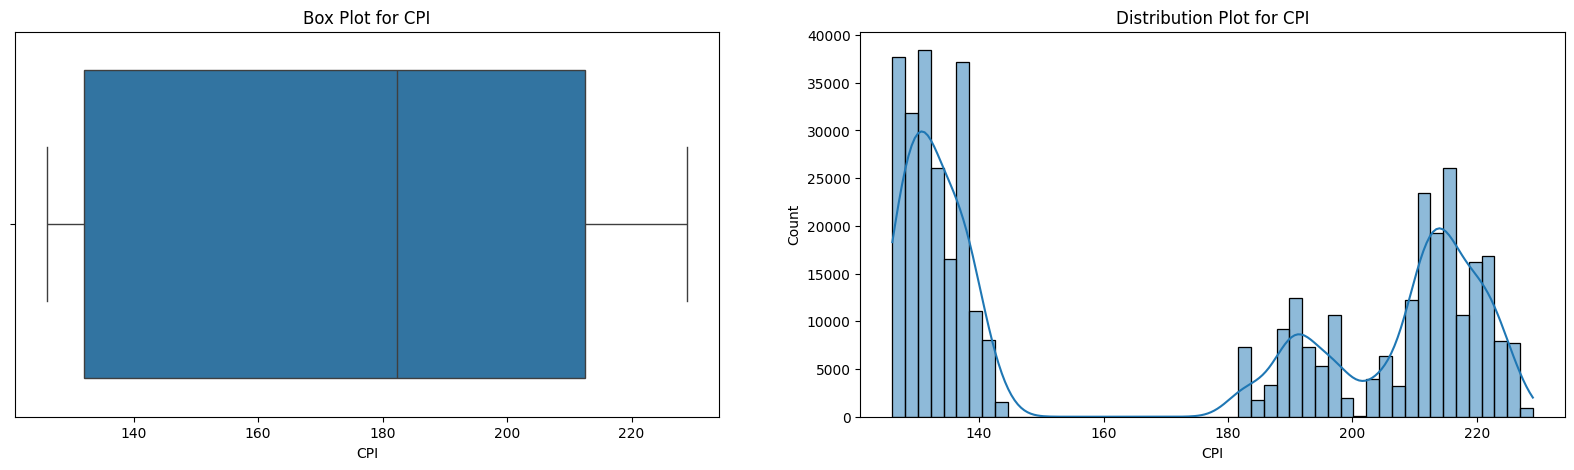

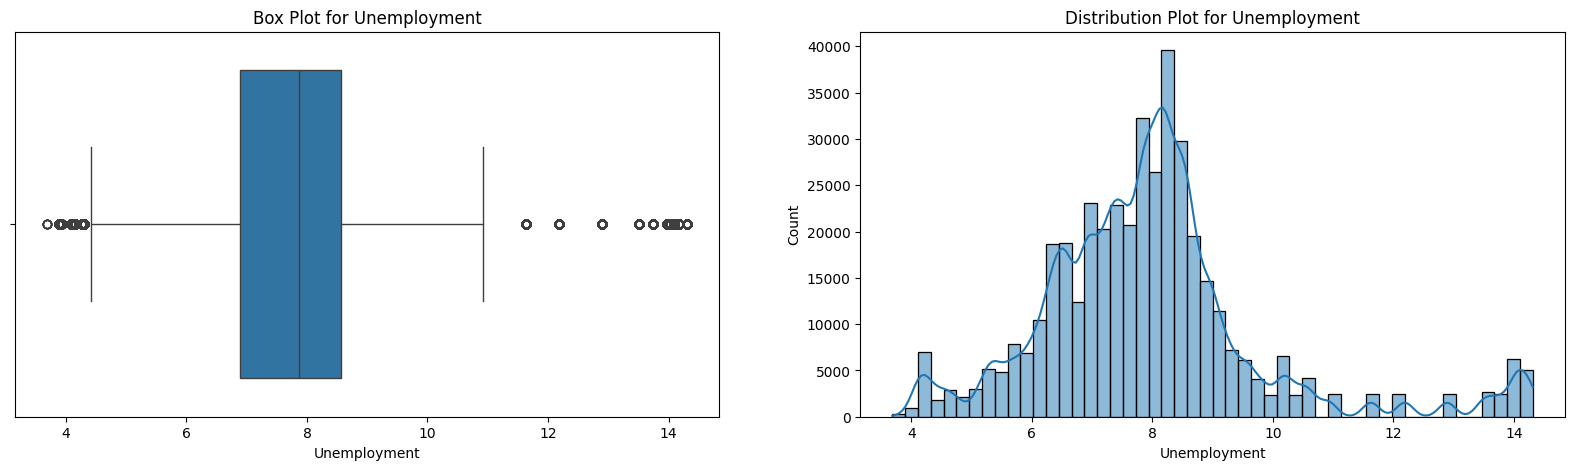

In [ ]:
for i in numeric_columns:
    plot(df, i)

In [ ]:
df.IsHoliday_x.value_counts()

IsHoliday_x
False    391909
True      29661
Name: count, dtype: int64

In [ ]:
df.IsHoliday_y.value_counts()

IsHoliday_y
False    393529
True      29796
Name: count, dtype: int64

In [ ]:
df= df.drop(columns=['IsHoliday_x'])

# Replace column name
df.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [ ]:
df.dropna(subset=['Type', 'Size', 'Dept', 'Weekly_Sales'], inplace=True)

In [ ]:
df.shape

(421570, 16)

In [ ]:
print("Markdown1 =", df.MarkDown1.isnull().sum()/421570)
print("Markdown2 =", df.MarkDown2.isnull().sum()/421570)
print("Markdown3 =", df.MarkDown3.isnull().sum()/421570)
print("Markdown4 =", df.MarkDown4.isnull().sum()/421570)
print("Markdown5 =", df.MarkDown5.isnull().sum()/421570)

Markdown1 = 0.6425718148824632
Markdown2 = 0.7361102545247528
Markdown3 = 0.6748084541120098
Markdown4 = 0.6798467632896079
Markdown5 = 0.6407903788220224


In [ ]:
len(df[df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].isnull().all(axis=1)])

270138

In [ ]:
df.MarkDown1.fillna(0, inplace = True)
df.MarkDown2.fillna(0, inplace = True)
df.MarkDown3.fillna(0, inplace = True)
df.MarkDown4.fillna(0, inplace = True)
df.MarkDown5.fillna(0, inplace = True)

In [ ]:
df.isnull().sum()

Store           0
Type            0
Size            0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
df.Date=pd.to_datetime(df.Date, format="%d/%m/%Y")
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['dayOfWeek'] = df['Date'].dt.day
df = df.drop(columns=['Date'])
df.head()

,Store,Type,Size,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,month,year,dayOfWeek
0,1,A,151315.0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
1,1,A,151315.0,2.0,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
2,1,A,151315.0,3.0,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
3,1,A,151315.0,4.0,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5
4,1,A,151315.0,5.0,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,2010,5


In [ ]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)

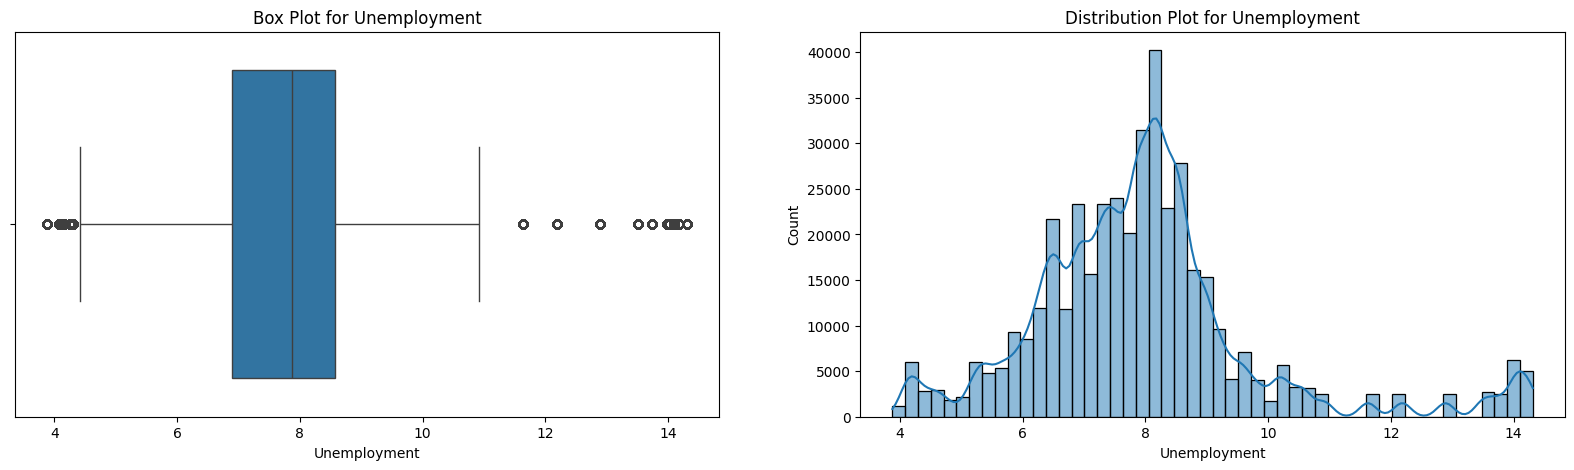

In [ ]:
plot(df, 'Unemployment')

In [ ]:
len(df[df['Unemployment'] > 11])

23917

In [ ]:

len(df[df['Unemployment'] > 12])

21415

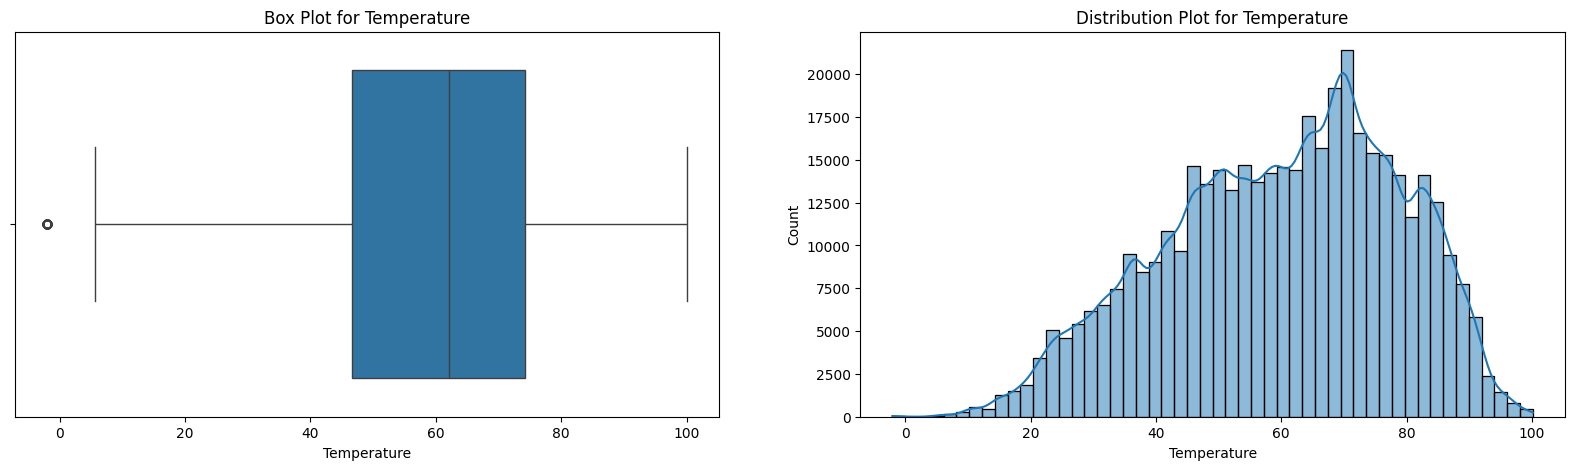

In [ ]:
plot(df, 'Temperature')

In [ ]:
# Statistical analysis
from scipy import stats
z_scores = stats.zscore(df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']])
z_scores

,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181
1,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181
2,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181
3,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181
4,-0.427943,-0.173069,-0.084662,-0.278117,-0.395181
...,...,...,...,...,...
421565,0.236078,-0.161646,-0.066576,-0.223697,-0.191187
421566,0.236078,-0.161646,-0.066576,-0.223697,-0.191187
421567,0.236078,-0.161646,-0.066576,-0.223697,-0.191187
421568,0.236078,-0.161646,-0.066576,-0.223697,-0.191187


In [ ]:
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

In [ ]:
df1 = df[(df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']] != 0).any(axis=1)]

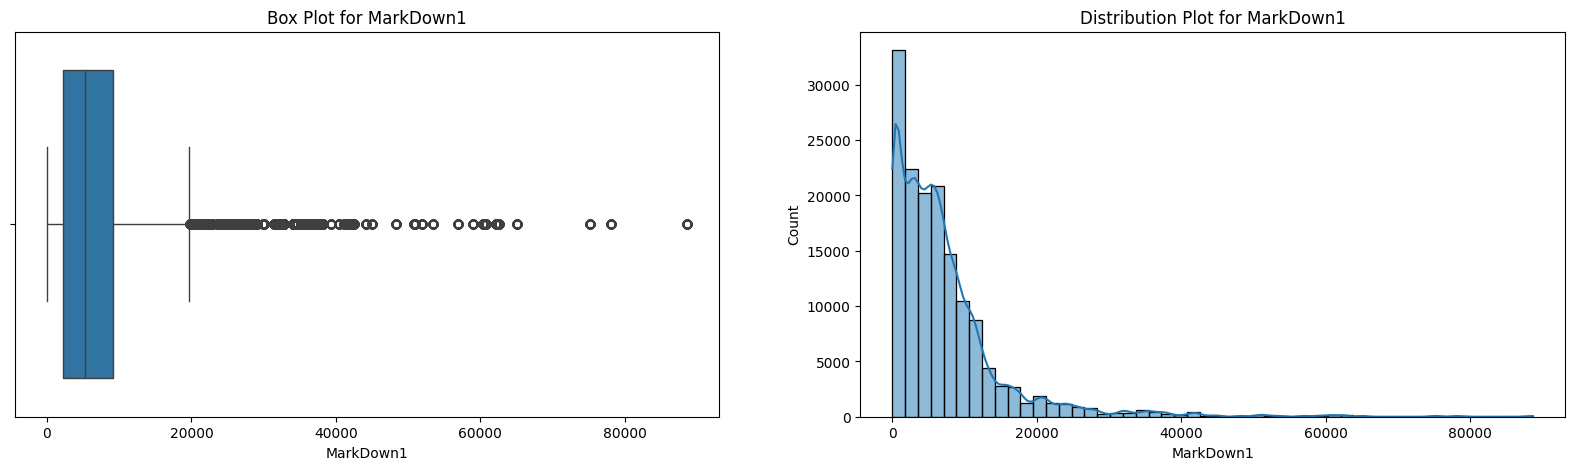

In [ ]:
plot(df1, 'MarkDown1')

In [ ]:
df.MarkDown1.fillna(df.MarkDown1.median(), inplace=True)

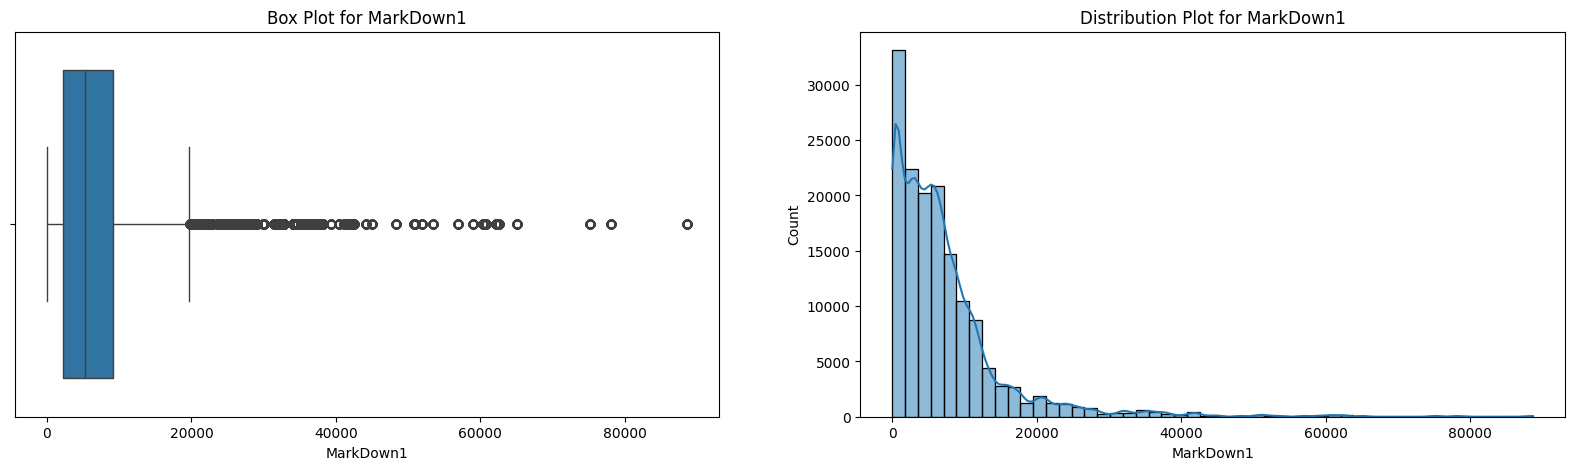

In [ ]:
plot(df1, 'MarkDown1')

In [ ]:
df.MarkDown1.fillna(df.MarkDown1.median(), inplace=True)

In [ ]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,NaN,NaN,NaN,28/06/2013,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
df1[Markdown1]

NameError: name 'Markdown1' is not defined

In [ ]:
df

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,A,151315.0,1.0,05/02/2010,24924.50,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,A,151315.0,2.0,05/02/2010,50605.27,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
2,1,A,151315.0,3.0,05/02/2010,13740.12,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
3,1,A,151315.0,4.0,05/02/2010,39954.04,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
4,1,A,151315.0,5.0,05/02/2010,32229.38,False,42.31,2.572,5336.52,NaN,NaN,NaN,NaN,211.096358,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423320,45,NaN,NaN,NaN,28/06/2013,NaN,NaN,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
423321,45,NaN,NaN,NaN,05/07/2013,NaN,NaN,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
423322,45,NaN,NaN,NaN,12/07/2013,NaN,NaN,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
423323,45,NaN,NaN,NaN,19/07/2013,NaN,NaN,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
df.isnull().sum()

Store                0
Type              1755
Size              1755
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday_x       1755
Temperature          0
Fuel_Price           0
MarkDown1            0
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
IsHoliday_y          0
dtype: int64

In [ ]:
df.dropna('Weekly_Sales')

TypeError: DataFrame.dropna() takes 1 positional argument but 2 were given

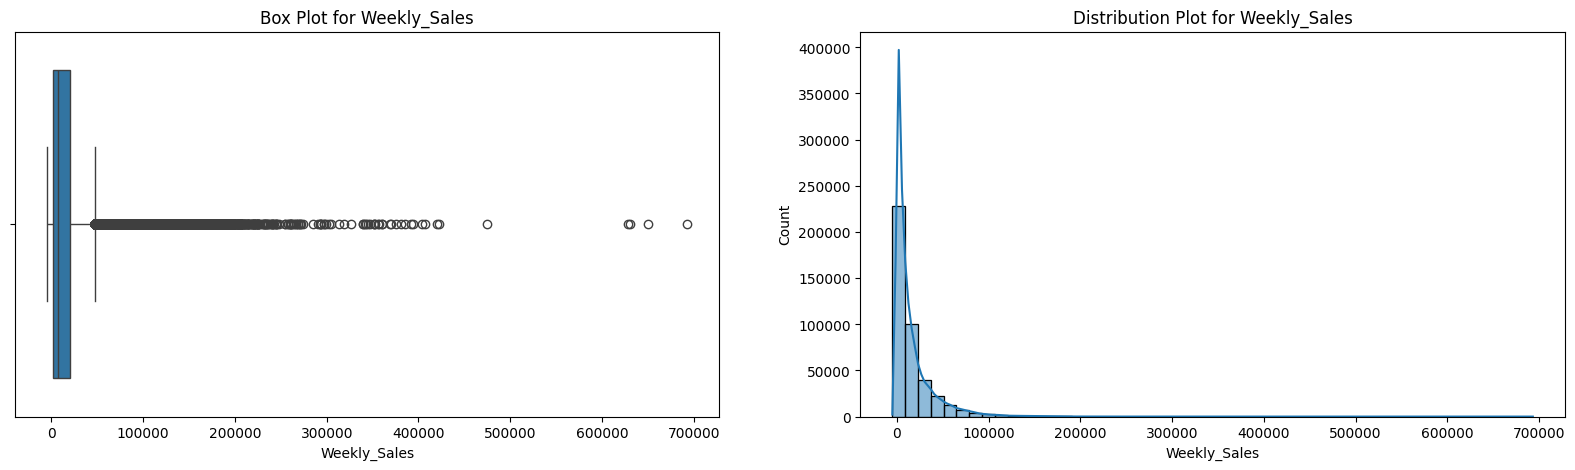

In [ ]:
plot(df, 'Weekly_Sales')

In [ ]:
df.drop(df[(df['Weekly_Sales'] < 0) | (df['Weekly_Sales'] >= 450000)].index, inplace=True)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (<ipython-input-88-ca6933ee00f4>, line 1)

In [ ]:
(df['Weekly_Sales'] < 0).value_counts()

Weekly_Sales
False    422040
True       1285
Name: count, dtype: int64

In [ ]:
len(df['Weekly_Sales'] >= 450000)

423325

In [ ]:
columns=["Type", "IsHoliday"]
encode=LabelEncoder()

for column in columns:
  encode.fit(df[[column]])
  df[column] = encode.transform(df[[column]])

In [ ]:
# Encoding categorical variables and scaling numerical features.
from sklearn.preprocessing import LabelEncoder, StandardScaler
encoder = OneHotEncoder(sparse_output=True)
scaler = StandardScaler()
scaler.fit(df)
scaler_df = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [ ]:
scaler_df.head(7)

In [ ]:
x=scaler_df.drop("Weekly_Sales",axis=1)
y=scaler_df["Weekly_Sales"]

In [ ]:
# Split data for training and testing & Optimizing model parameters
from sklearn.model_selection import train_test_split, GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
# Randomly sample
sampled_data = df.sample(frac=0.05, random_state=42)
X=sampled_data.drop("Weekly_Sales",axis=1)
Y=sampled_data["Weekly_Sales"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25, random_state=42)

In [ ]:
# Machine Learning : Identifying algorithms/Model
from lazypredict.Supervised import LazyRegressor
from sklearn.datasets import load_boston

In [ ]:
import sklearn
print(sklearn.__version__)


In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)
print(models)

In [ ]:
# Machine Learning : Evaluation
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor().fit(x_train,y_train)
y_pred_train = RF_model.predict(x_train)
y_pred_test = RF_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test


In [ ]:
from xgboost import XGBRegressor
XGB_model=XGBRegressor().fit(x_train,y_train)
y_pred_train = XGB_model.predict(x_train)
y_pred_test = XGB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT_model=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_train = DT_model.predict(x_train)
y_pred_test = DT_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor
GB_model=GradientBoostingRegressor().fit(x_train,y_train)
y_pred_train = GB_model.predict(x_train)
y_pred_test = GB_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
ET_model=ExtraTreesRegressor().fit(x_train,y_train)
y_pred_train = ET_model.predict(x_train)
y_pred_test = ET_model.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

r2_train, r2_test

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful